<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [75]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [2]:
# Read CSV
house_csv = r"C:\Users\Sanjeshni\Desktop\doc\DATA\Sacramento_transactions.csv"

In [3]:
house = pd.read_csv(house_csv)

In [4]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [14]:
house.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [6]:
house.shape

(985, 12)

In [16]:
house.isnull().sum()


street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [7]:
house.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
street,985,981,8306 CURLEW CT,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,985,39,SACRAMENTO,439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip,985.0,NaN,NaN,NaN,95750.697462,85.176072,95603.0,95660.0,95762.0,95828.0,95864.0
state,985,1,CA,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beds,985.0,NaN,NaN,NaN,2.911675,1.307932,0.0,2.0,3.0,4.0,8.0
baths,985.0,NaN,NaN,NaN,1.77665,0.895371,0.0,1.0,2.0,2.0,5.0
sq__ft,985.0,NaN,NaN,NaN,1314.916751,853.048243,0.0,952.0,1304.0,1718.0,5822.0
type,985,4,Residential,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sale_date,985,5,Mon May 19 00:00:00 EDT 2008,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,985.0,NaN,NaN,NaN,234144.263959,138365.839085,1551.0,145000.0,213750.0,300000.0,884790.0


In [ ]:
# How to look to clean the date
# 1. Investigate 0 Beds - findings could be only lands
# 2. Investigate 0 baths observations
# 3. Investigate 0 sq_ft
# 4. Investigate outliers

In [8]:
# Data types
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [22]:
# Zip is catogerical valus, should be string
house['zip'] = house['zip'].astype(str)

In [23]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    object 
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


In [10]:
house[house['beds'] == 0] #1. Could be only land

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


<AxesSubplot:>

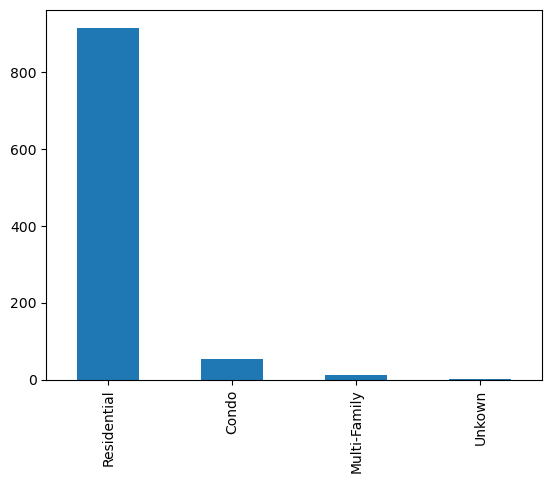

In [25]:
house['type'].value_counts().plot(kind='bar')

<AxesSubplot:>

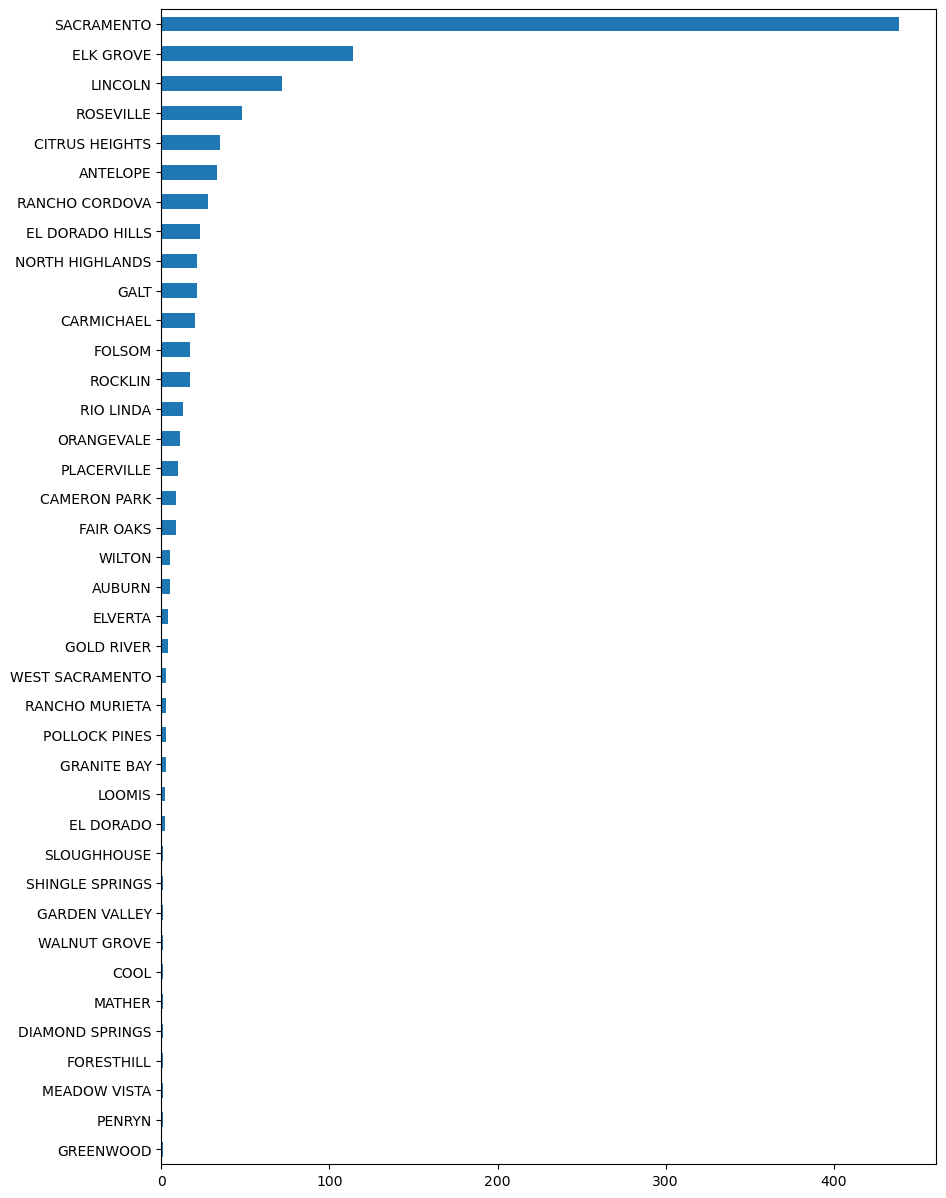

In [28]:
# City
house['city'].value_counts().sort_values().plot(kind='barh', figsize=(10,15))

In [5]:
import folium
import pandas as pd

# make base map
m = folium.Map(location=[38.575764, -121.478851], zoom_start=10)

# add marker/circle
for i in range(0, len(house.head(1000))):
    folium.Marker(
        location=[house.iloc[i]['latitude'], house.iloc[i]['longitude']]
    ).add_to(m)
    
display(m)
               

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [ ]:
# ANSWER

# Price - Most important

#### 2.2 List all possible variables which might be Predictor variable.

In [ ]:
# ANSWER - features that help prdeict house price

##beds
##bath
##sqft
##Type


In [12]:
#Target variable
Y = house['price']

In [11]:
X = house['beds']

In [16]:
def draw_scatter_plot(X, Y):
    
    
    fig = plt.figure(figsize=(15,7))
    
    ax = plt.gca()
    
    ax.scatter(X, Y, c='b')
    
    plt.show()

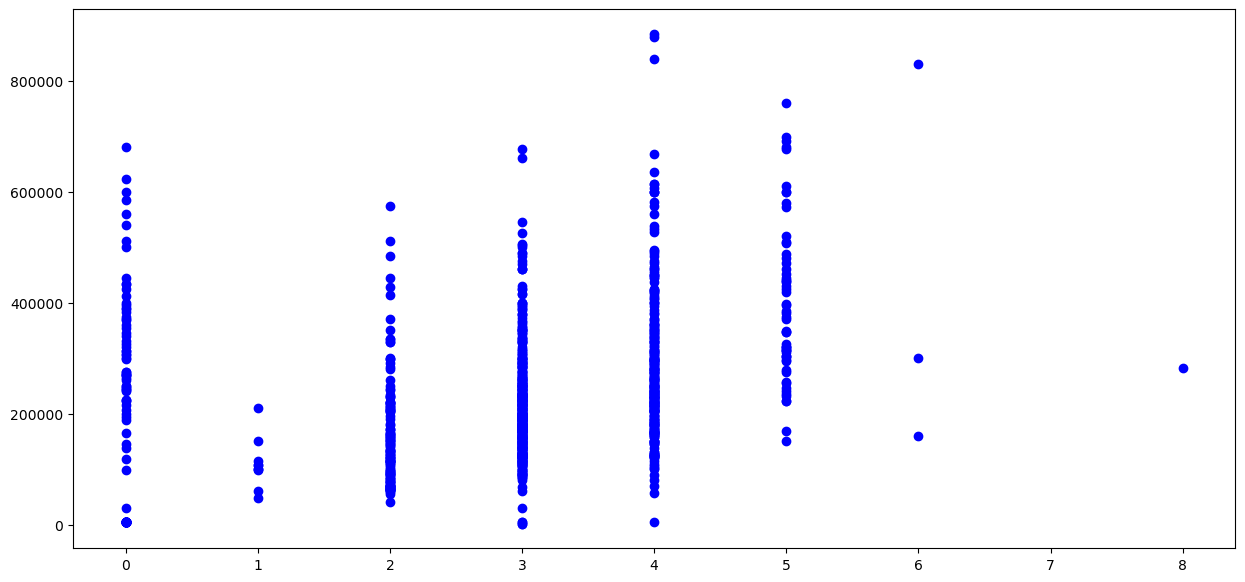

In [17]:
#beds
draw_scatter_plot(house['beds'], house['price'])

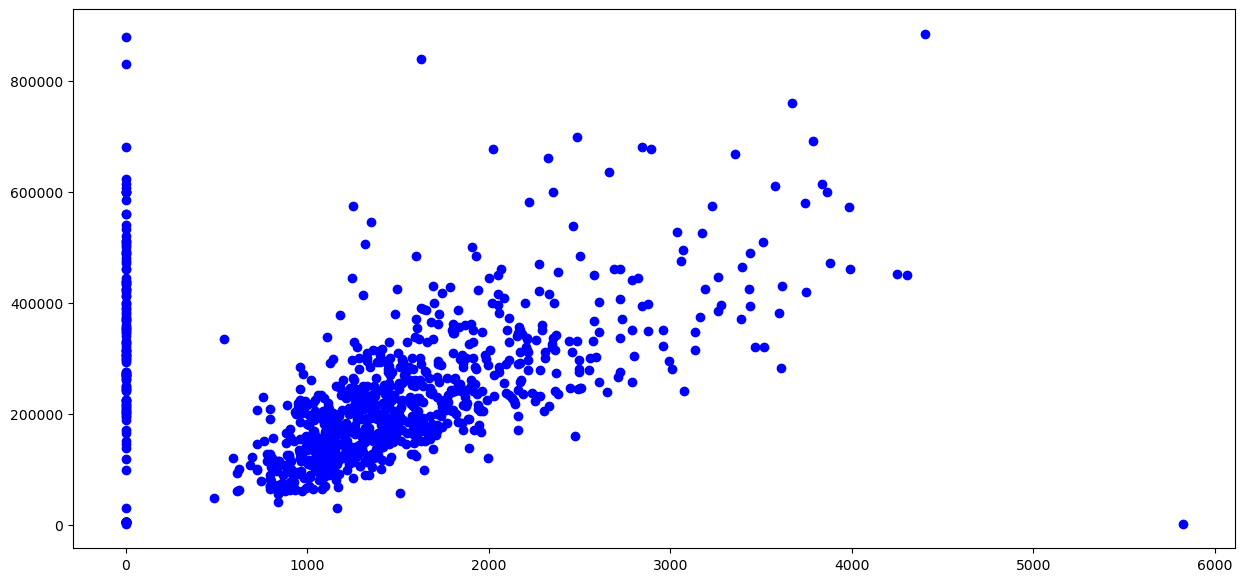

In [18]:
#sq__ft
draw_scatter_plot(house['sq__ft'], house['price'])

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [32]:
# ANSWER
house.corr()

,beds,baths,sq__ft,price,latitude,longitude
beds,1.000000,0.839650,0.684041,0.342024,-0.291307,-0.053993
baths,0.839650,1.000000,0.665690,0.416208,-0.235792,0.016582
sq__ft,0.684041,0.665690,1.000000,0.333897,-0.383274,-0.177742
price,0.342024,0.416208,0.333897,1.000000,-0.039573,0.284485
latitude,-0.291307,-0.235792,-0.383274,-0.039573,1.000000,0.387925
longitude,-0.053993,0.016582,-0.177742,0.284485,0.387925,1.000000


In [ ]:
# 3 best Predictors

1. Beds
2. Baths
3. Sq_ft

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [29]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_hat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234144.263959
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234144.263959
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234144.263959
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234144.263959


In [32]:
# ANSWER
#house.price.mean()

house['y_hat'] = house['price'].mean()

In [33]:
house_1 = house[house['sq__ft'] !=0]

In [34]:
house_1.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,814.0,95761.491400,8.534400e+01,95603.000000,95670.000000,95820.000000,95828.000000,95864.000000
beds,814.0,3.244472,8.521373e-01,1.000000,3.000000,3.000000,4.000000,8.000000
baths,814.0,1.960688,6.698038e-01,1.000000,2.000000,2.000000,2.000000,5.000000
sq__ft,814.0,1591.146192,6.638419e+02,484.000000,1144.000000,1418.500000,1851.000000,5822.000000
price,814.0,229448.369779,1.198256e+05,2000.000000,148750.000000,207986.500000,284973.250000,884790.000000
latitude,814.0,38.577044,1.263146e-01,38.241514,38.473885,38.591720,38.674704,39.008159
longitude,814.0,-121.378687,1.197365e-01,-121.550527,-121.451501,-121.405456,-121.325844,-120.597599
y_hat,814.0,234144.263959,2.883051e-09,234144.263959,234144.263959,234144.263959,234144.263959,234144.263959


In [97]:
X = house_1['sq__ft']
Y = house_1['price']

Yhat = house_1['y_hat']

In [99]:
def draw_plot(X, Y , Yhat):
    
    fig = plt.figure(figsize=(15,7))
    
    ax =plt.gca()
    
    ax.scatter(X, Y,  c='b')
    ax.plot(X, Yhat, color='r');
    
    
    plt.show()

                     

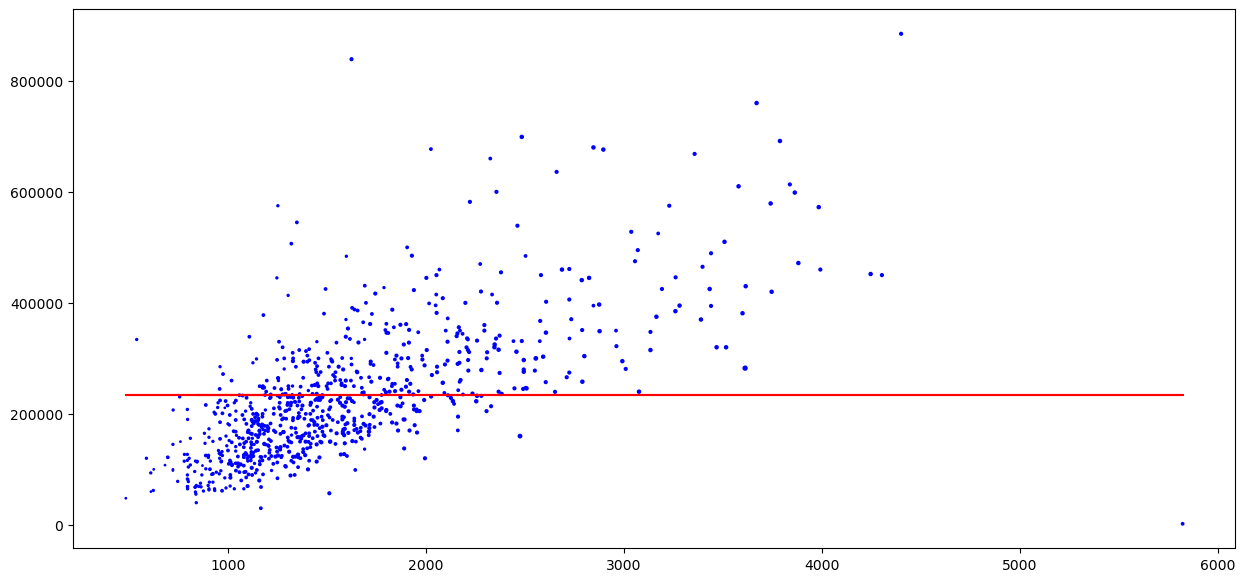

In [100]:
 draw_plot(X, Y, Yhat)

#### 2.5 Find Residuals

Find difference between actual value and predicted value. Use absolute value.

In [101]:
# ANSWER

res = abs(house_1['price'] - house_1['y_hat']).mean()
res

89178.91101784779

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [128]:
# ANSWER
X = house_1['sq__ft']
Y = house_1['price']


##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [129]:
# ANSWER

def calculate_beta_1(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
   
    
    n = np.sum((Y - Ybar) * (X - Xbar))
    d = np.sum(np.square(X - Xbar))
    
    beta_1 = n/d
    
    return beta_1

In [130]:
beta_1 = calculate_beta_1(X,Y)
beta_1

125.21648667984462

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [61]:
# ANSWER

def calculate_beta_0(X, Y):
    Xbar = X.mean()
    Ybar = Y.mean()
   
   
    beta_0 = Ybar - calculate_beta_1(X,Y) * Xbar
    
    return beta_0

In [62]:
beta_0 = calculate_beta_0(X,Y)
beta_0

30210.633866918943

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [63]:
# ANSWER
def calculate_yhat(x, b0, b1):
    return b0 + b1 * x
                   

In [65]:
Yhat = calculate_yhat(X, beta_0, beta_1)
Yhat

0      134891.616731
1      176338.273822
2      129882.957264
3      136895.080518
4      130008.173751
           ...      
980    315704.223497
981    215155.384693
982    182473.881670
983    241200.413922
984    200755.488725
Name: sq__ft, Length: 814, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [67]:
# ANSWER
def calculate_residual(Y, Yhat):
    res = Y - Yhat
    return res

In [68]:
resi = calculate_residual(Y, Yhat)
abs(resi)

0       75669.616731
1      108126.273822
2       61002.957264
3       67588.080518
4       48108.173751
           ...      
980     83279.223497
981     18844.615307
982     52526.118330
983      5899.413922
984     34982.511275
Length: 814, dtype: float64

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [ ]:
# ANSWER

In [69]:
def calculate_total_sum_of_square(Y):
    Ybar = np.mean(Y)
    SStot = np.square(Y - Ybar)
    SStot = np.sum(SStot)
    return SStot

In [70]:
def calculate_residual_sum_of_square(Y, Yhat):
    SSres = np.square(Y - Yhat)
    SSres = np.sum(SSres)
    return SSres

In [71]:
def calculate_r_square(Y, Yhat):
    SStot = calculate_total_sum_of_square(Y)
    SSres = calculate_residual_sum_of_square(Y, Yhat)
    Rsquare = 1 - (SSres/SStot)
    return Rsquare

In [72]:
calculate_r_square(Y, np.mean(Y))

0.0

In [73]:
calculate_r_square(Y, calculate_yhat(X, beta_0, beta_1))

0.4812307133326901

##### 2.7.F [BONUS] Draw Plot of Predicted Line

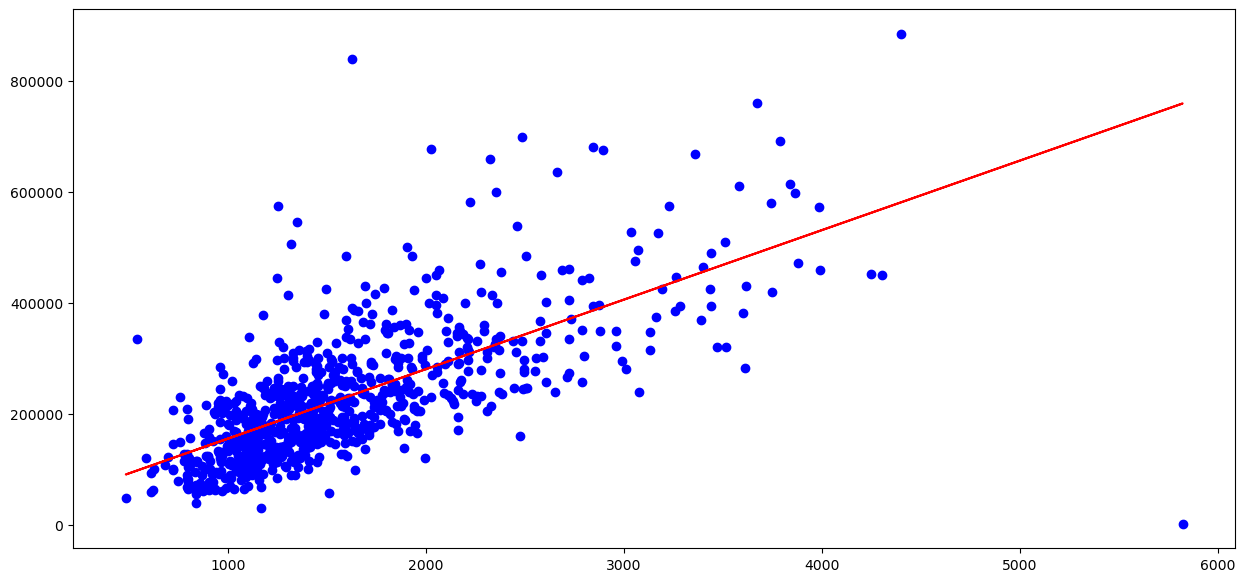

In [83]:
# ANSWER
draw_plot(X, Y, Yhat)

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Residuals

In [86]:
house_1.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,y_hat,Yhat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234144.263959,134891.616731
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234144.263959,176338.273822
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234144.263959,129882.957264
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234144.263959,136895.080518
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234144.263959,130008.173751


In [95]:
# ANSWER
house_1['Yhat'] = Yhat

C:\Users\Sanjeshni\AppData\Local\Temp\ipykernel_5360\1053473686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_1['Yhat'] = Yhat


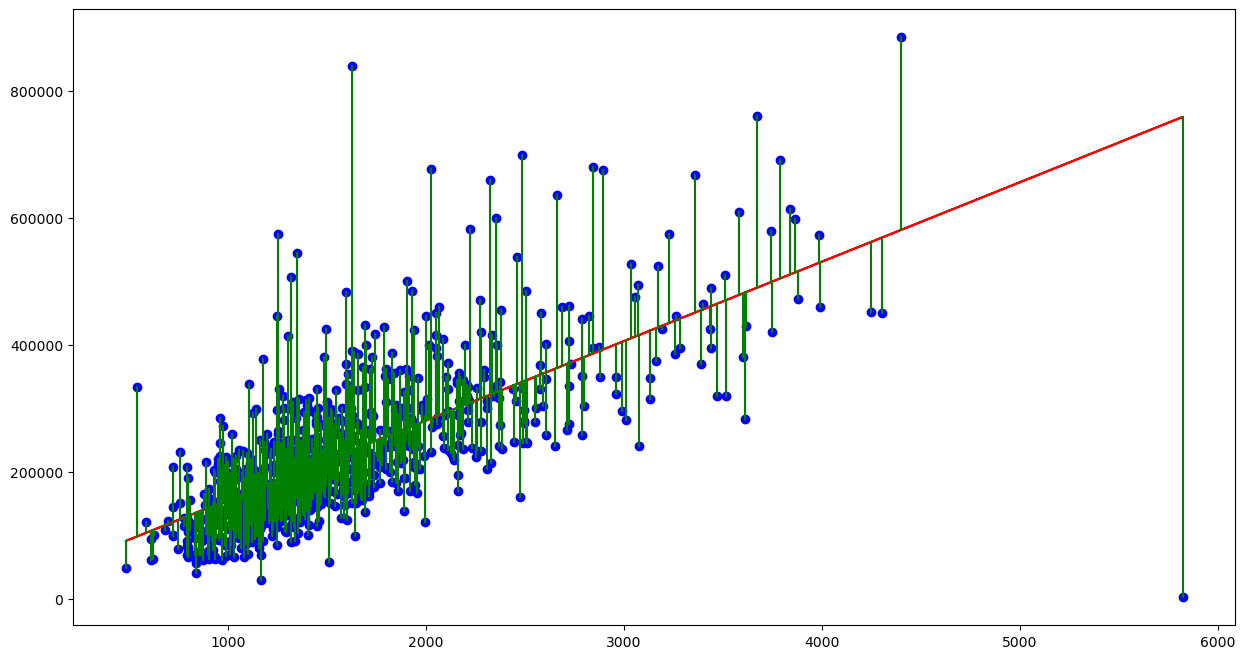

In [90]:
# create a figure
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=X, y=Y, c='b')
ax.plot(X, Yhat, color='r');

# iterate over predictions
for _, row in house_1.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Yhat']), 'g-')

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [91]:
# ANSWER
xpred = 1204
xpred

1204

In [92]:
beta_0

30210.633866918943

In [93]:
beta_1

125.21648667984462

In [94]:
Ypred = beta_1 * xpred + beta_0
Ypred

180971.28382945186



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



